# **[LS22] Title of the lab**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Introduction
In this lab, we aim to prepare students for utilizing data science and decision making skillsets with the UC Berkeley 1973 Graduate Admission
Rate dataset. The objectives of this lab are as follows:


- **Senses and Instrumentation**:
  - Learn how science uses senses and instruments for observation.
  - Trust instruments for precise observations where direct senses can't reach.
  - Understand instrument validation and the extension of objective reality through their use.

- **Probabilistic Reasoning**:
  - Understand the importance of confidence in judgments and decision-making under uncertainty.
  - Recognize inherent uncertainties in claims and the value of scientific expressions of uncertainty.

- **Confirmation Bias**:
  - Be aware of the tendency to favor existing beliefs, even against evidence.
  - Learn about selective exposure and biased assimilation, and how to mitigate confirmation bias by seeking counter-evidence.

- **When Is Science Suspect**:
  - Acknowledge the misuse of science in reinforcing power structures.
  - Be cautious of science in studies involving human groups and aware of social dynamics affecting scientific assessments.

<br/>

<hr style="border: 1px solid #fdb515;" />

In [ ]:
# Sync Google Drive to get CSV file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load UC Berkeley 1973 Graduate Admission Rate Dataset
berkeley = pd.read_csv('/content/drive/MyDrive/SSS/berkeley.csv')
berkeley.head(10)

,Year,Major,Gender,Admission
0,1973,C,F,Rejected
1,1973,B,M,Accepted
2,1973,Other,F,Accepted
3,1973,Other,M,Accepted
4,1973,Other,M,Rejected
5,1973,Other,M,Rejected
6,1973,F,F,Accepted
7,1973,Other,M,Accepted
8,1973,Other,M,Rejected
9,1973,A,M,Accepted


<!-- BEGIN QUESTION -->
**Question 1 (short answer):** Just at first glance, what can you observe from the data? What assumptions can you make based on this data and your prior knowledge of the background on admission or your classroom at UC Berkeley?

***If you do not have any prior knowledge, explain your assumptions.*

_Your answer here_

<!-- End QUESTION -->

In [ ]:
# Calculate the total number of females and males
total_f = (berkeley["Gender"] == "F").sum()
total_m = (berkeley["Gender"] == "M").sum()

# Calculate the number of accepted females and males
accepted_f = berkeley[(berkeley["Admission"] == "Accepted") & (berkeley["Gender"] == "F")].shape[0]
accepted_m = berkeley[(berkeley["Admission"] == "Accepted") & (berkeley["Gender"] == "M")].shape[0]

# Calculate the acceptance rates for females and males
acceptance_rate_f = (accepted_f / total_f) * 100
acceptance_rate_m = (accepted_m / total_m) * 100

# Print the results
print(f"1973's Berkeley admission rate seems to be: female: {acceptance_rate_f}% and male: {acceptance_rate_m}%")

1973's Berkeley admission rate seems to be: female: 34.57532978477204% and male: 44.27860696517413%


In [ ]:
# Create a pivot table to get the totals for Accepted and Rejected admissions per Gender
admission_f_m = pd.read_csv("berkeley.csv", index_col = False)
admission_f_m = pd.pivot_table(admission_f_m, index = "Gender", columns = "Admission", aggfunc="size")
admission_f_m = admission_f_m.reset_index()
admission_f_m["Gender"] = ["Female", "Male"]
admission_f_m

Admission,Gender,Accepted,Rejected
0,Female,1494,2827
1,Male,3738,4704


In [ ]:
# Calculate acceptance rates
admission_f_m["Acceptance Rate"] = admission_f_m["Accepted"] / (admission_f_m["Accepted"] + admission_f_m["Rejected"])

# The DataFrame admission_f_m now includes the acceptance rates
admission_f_m


Admission,Gender,Accepted,Rejected,Acceptance Rate
0,Female,1494,2827,0.345753
1,Male,3738,4704,0.442786


Text(0, 0.5, 'Gender')

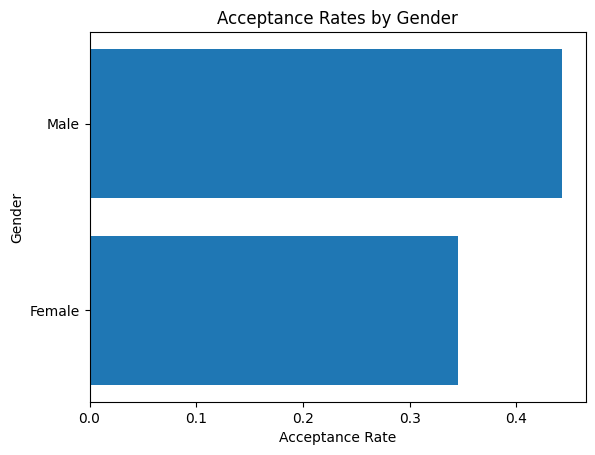

In [ ]:
plt.barh(admission_f_m["Gender"], admission_f_m["Acceptance Rate"])
plt.title("Acceptance Rates by Gender")
plt.xlabel("Acceptance Rate")
plt.ylabel("Gender")